In [2]:
import torch
import torch.nn as nn
import torchvision
def Down(in_channels,out_channels):
    block = nn.Sequential(
        nn.Conv2d(in_channels,out_channels,3,bias=True,padding=1),
        nn.LeakyReLU(0.2)
    )
    return block

def Up(in_channels,out_channels):
    block = nn.Sequential(
        nn.ConvTranspose2d(in_channels,out_channels, kernel_size=3,padding=1),
        nn.LeakyReLU (0.2)
    )
    return block
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.down1 = Down(1, 4)
        self.down2 = Down(4, 12)
        self.up2 = Up(12, 4)
        self.up1 = Up(8, 1)
        

    def forward(self, x):
        d1 = self.down1(x)
        d2 = self.down2(d1)
        u1 = self.up2(d2)
        u0 = self.up1(torch.cat([u1, d1], 1))
        y=u0
        return y

In [23]:
height=torchvision.datasets.ImageFolder('../datasets/heightmap/Taiwan/B')
aerial=torchvision.datasets.ImageFolder('../datasets/heightmap/Taiwan/aerial')

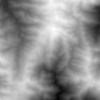

In [33]:
height[0][0]

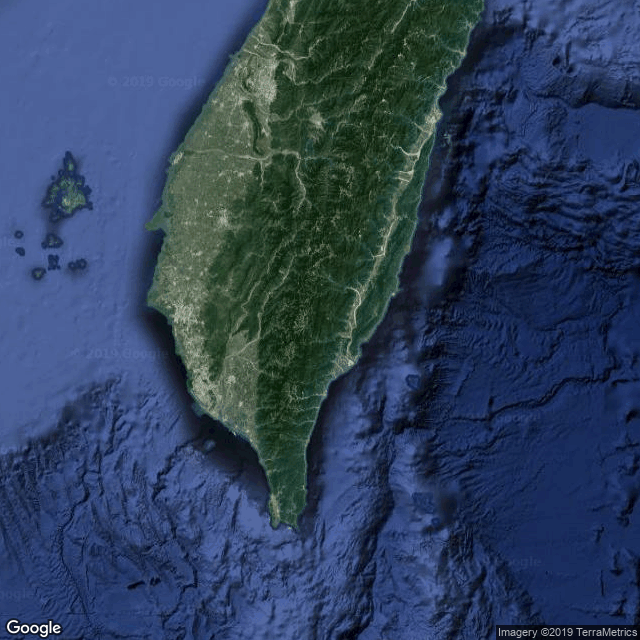

In [35]:
aerial[100][0]

In [ ]:
loader=Data.DataLoader(
    dataset=dataset,
    batch_size=8,
    shuffle=True 
)
model=UNet()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = .01)